<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/BT2_GRAB_BIKE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


Discount Rate: 65.81896957234173


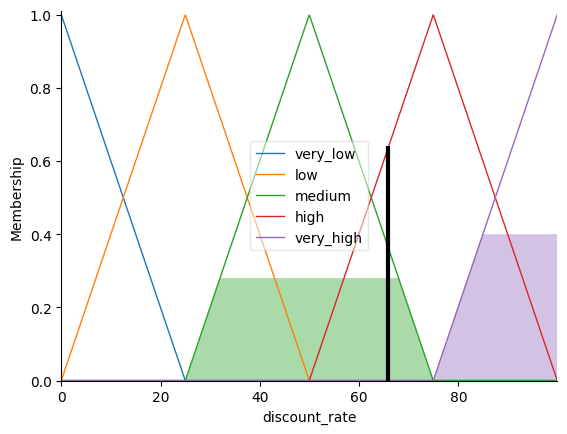

In [16]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


store_rating = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'store_rating')
sales_volume = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'sales_volume')
profit_margin = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'profit_margin')
seasonal_event = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'seasonal_event')
competitor_discounts = ctrl.Antecedent(np.arange(0, 3.1, 0.1), 'competitor_discounts')

discount_rate = ctrl.Consequent(np.arange(0, 100, 0.1), 'discount_rate')

store_rating.automf(names=['low', 'medium', 'high'])
sales_volume.automf(names=['low', 'medium', 'high'])
profit_margin.automf(names=['low', 'medium', 'high'])
seasonal_event.automf(names=['none', 'moderate', 'high'])
competitor_discounts.automf(names=['low', 'medium', 'high'])
discount_rate.automf(names=['very_low', 'low', 'medium', 'high', 'very_high'])

rules = [
    ctrl.Rule(store_rating['high'] & sales_volume['high'] & profit_margin['high'], discount_rate['very_low']),
    ctrl.Rule(store_rating['low'] & sales_volume['low'] & profit_margin['high'], discount_rate['high']),
    ctrl.Rule(seasonal_event['high'] & competitor_discounts['high'], discount_rate['very_high']),
    ctrl.Rule(store_rating['medium'] & sales_volume['medium'] & profit_margin['medium'], discount_rate['medium']),
    ctrl.Rule(competitor_discounts['low'] & profit_margin['low'] & sales_volume['high'], discount_rate['very_low']),
    ctrl.Rule(store_rating['low'] & seasonal_event['none'], discount_rate['medium']),
    ctrl.Rule(sales_volume['low'] & profit_margin['low'], discount_rate['very_high'])
]


pricing_control = ctrl.ControlSystem(rules)
pricing_simulation = ctrl.ControlSystemSimulation(pricing_control)
pricing_simulation.input['store_rating'] = 4.3
pricing_simulation.input['sales_volume'] = 53
pricing_simulation.input['profit_margin'] = 20
pricing_simulation.input['seasonal_event'] = 2.1
pricing_simulation.input['competitor_discounts'] = 2.2

pricing_simulation.compute()
print(f"Discount Rate: {pricing_simulation.output['discount_rate']}")


discount_rate.view(sim=pricing_simulation)
